## Neural Networks

**For training Tensorflow models, you should connect to a Colab runtime with GPU to make training much faster**


This part involves building and evaluating neural network models for image classification using the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, such as airplanes, cars, birds, and more. In this assignment, we will first use a vanilla neural network to classify these images and later compare its performance to a more specialized model, a Convolutional Neural Network (CNN), which is better suited for handling image data.

**The images are of shape (32, 32, 3), where 32x32 is the resolution and 3 represents the RGB color channels.**

If you are curious how about accurate models are on this dataset, check out this [benchmark](https://paperswithcode.com/sota/image-classification-on-cifar-10)

**Learning Objectives:**

1. Understand the challenges of using a MLP neural network for image classification tasks.

2. Gain practical experience in training a convolutional neural network (CNN) for image classification.

3. Compare the effectiveness of different neural network architectures for computer vision tasks.



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from typing import Tuple
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset

In this function, we will load the CIFAR-10 dataset, normalize it, and one-hot encode the labels.

In [ ]:
def load_and_preprocess_data() -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Load and preprocess the CIFAR-10 dataset.

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: Training and test sets, both inputs and targets as NumPy arrays.
    """
    # Load the CIFAR-10 dataset
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # Normalize the features
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # One-hot encode the target labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return X_train, X_test, y_train, y_test

# Visualize dataset

This function will help us visualize a few images from the dataset before starting to build the models.


In [ ]:
def visualize_images(X: np.ndarray, y: np.ndarray, class_names: list[str], num_images: int = 10) -> None:
    """
    Display a few sample images from the dataset.

    Args:
        X (np.ndarray): Image data.
        y (np.ndarray): Corresponding labels.
        class_names (list[str]): List of class names.
        num_images (int, optional): Number of images to display. Defaults to 10.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i])
        plt.title(class_names[np.argmax(y[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# MLP neural network model [15 points + 5 Bonus]

You should take a look at the tensorflow guides on how to create a MLP using tensorflow.

Set up the layers
The basic building block of a neural network is the [layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

1. Create a Sequential model.
2. Add a [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer to convert image data into a 1D vector.
3. Add two [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers with ReLU activation.
4. Add a Dense output layer with softmax activation for classification.
5. Compile the model using [Adam optimizer](https://keras.io/api/optimizers/adam/), categorical crossentropy loss, and accuracy metric.

Adam is variant of SGD that we studied in class.

categorical crossentropy loss is an extension of the crossentropy loss from logistic regression to multiple categories. [Here](https://www.tensorflow.org/api_docs/python/tf/keras/losses) is a list of different kind of losses that tensorflow implements.

## Define function to create MLP model [7 points]

In [ ]:
def create_mlp_model(input_shape: int) -> tf.keras.Model:
    """
    Create and compile a MLP neural network model.

    Args:
        input_shape (int): The number of input features.

    Returns:
        tf.keras.Model: Compiled TensorFlow model.

    Detailed Notes:
        This function creates a fully connected (vanilla) neural network model:
        1. Input Layer: Flatten the input images into a 1D vector.
        2. Hidden Layers:
            - First hidden layer with 512 units and ReLU activation function.
            - Second hidden layer with 256 units and ReLU activation function.
        3. Output Layer: 10 units (for 10 classes) with softmax activation for classification.
        The model is compiled using the Adam optimizer, Categorical Crossentropy as the loss function,
        and Accuracy as the evaluation metric.
    """
    # fill code here

    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

Now lets run this model and see what kind of accuracy we get.

Remember, a MLP neural network takes in a 1D array. Images are 2D arrays, so you need to first convert them into 1D representation.


In [ ]:
# first load the data
X_train, X_test, y_train, y_test = load_and_preprocess_data()

# flatten the input
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

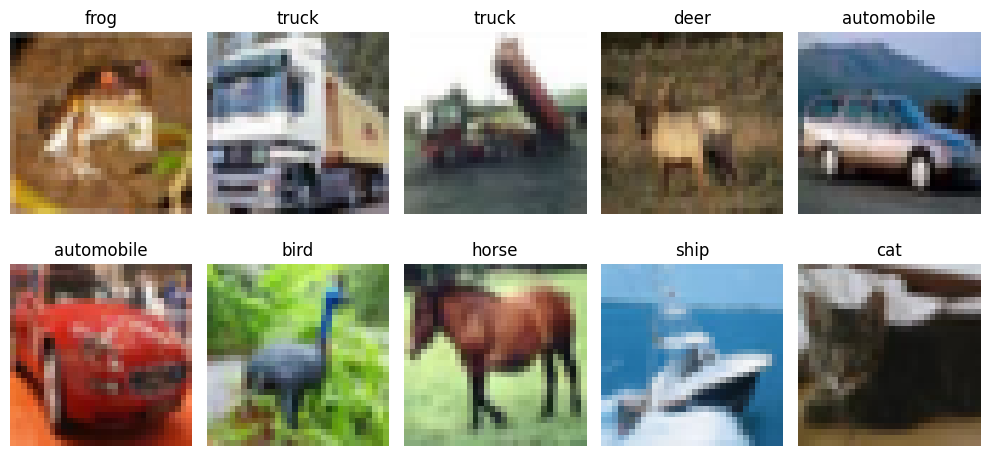

In [ ]:
visualize_images(X_train, y_train, class_names)

### Gradient Descent Refresher

**Epoch**

An epoch is one complete pass through the entire training dataset. During an epoch, the model sees every sample in the training set once, processes it, and updates its weights based on the error calculated from predictions.

Typically, neural networks are trained for multiple epochs, allowing the model to refine its weights gradually.

**Example:**

Suppose you have a dataset with 10,000 training samples, and you train your model for 10 epochs. This means that during training:


*   The model will process the entire dataset 10 times.
*   Each epoch involves making predictions on all 10,000 samples and updating the weights accordingly.

**Batch Size**

The batch size is the number of training samples processed before the model updates its weights. Instead of updating the model after every single training sample (which can be slow and computationally expensive), the data is split into smaller groups called batches.

**Example:**

If you have a dataset of 1,000 samples and set the batch size to 100:
The dataset is split into 10 batches (1,000 / 100 = 10).
The model processes each batch separately, makes predictions, calculates the loss, and updates the weights.
Once all 10 batches are processed, it completes 1 epoch.


**How does this connect to Gradient Descent?**

There are three types of gradient descent:

**Batch Gradient Descent:**

The batch size is equal to the entire dataset (e.g., 10,000 samples in a single batch).
The model updates its weights only once per epoch.
It is computationally expensive for large datasets.

**Stochastic Gradient Descent (SGD):**

The batch size is set to 1 (i.e., the model updates its weights after every single sample).
It is fast but can be noisy, as each update is based on a single sample.


**Mini-Batch Gradient Descent (Most Common):**

The batch size is set to a value between 1 and the size of the entire dataset (e.g., 32, 64, 128).
It strikes a balance between the efficiency of Batch Gradient Descent and the noise reduction of SGD.


## Run the MLP neural network [8 points]

In [ ]:
# fill code to run the MLP and print out the test accuracy
# Create the model
model = create_mlp_model(input_shape=32*32*3)

# Train the model
history = model.fit(
    X_train_flat, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
352/352 - 5s - 13ms/step - accuracy: 0.3142 - loss: 1.9187 - val_accuracy: 0.3636 - val_loss: 1.7701
Epoch 2/10
352/352 - 1s - 3ms/step - accuracy: 0.3966 - loss: 1.6950 - val_accuracy: 0.4146 - val_loss: 1.6718
Epoch 3/10
352/352 - 1s - 3ms/step - accuracy: 0.4216 - loss: 1.6168 - val_accuracy: 0.4268 - val_loss: 1.5970
Epoch 4/10
352/352 - 1s - 4ms/step - accuracy: 0.4464 - loss: 1.5519 - val_accuracy: 0.4364 - val_loss: 1.6034
Epoch 5/10
352/352 - 1s - 4ms/step - accuracy: 0.4597 - loss: 1.5128 - val_accuracy: 0.4566 - val_loss: 1.5372
Epoch 6/10
352/352 - 1s - 4ms/step - accuracy: 0.4753 - loss: 1.4767 - val_accuracy: 0.4744 - val_loss: 1.4960
Epoch 7/10
352/352 - 2s - 6ms/step - accuracy: 0.4855 - loss: 1.4419 - val_accuracy: 0.4720 - val_loss: 1.4936
Epoch 8/10
352/352 - 1s - 3ms/step - accuracy: 0.4944 - loss: 1.4189 - val_accuracy: 0.4846 - val_loss: 1.4702
Epoch 9/10
352/352 - 1s - 3ms/step - accuracy: 0.5073 - loss: 1.3846 - val_accuracy: 0.4772 - val_loss: 1.4590


##Bonus [5 points]

As you can see the accuracy is pretty bad (~50%). Can you get an accuracy of at least 55% on the test set?

Briefly explain what you did to get credit.

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

def create_mlp_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dropout(0.15),
        Dense(256, activation='relu'),
        Dropout(0.15),
        Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.0001, beta_1=0.95)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Train
model = create_mlp_model(input_shape=(32*32*3,))
history = model.fit(
    X_train_flat, y_train,
    batch_size=64,
    epochs=60,
    validation_split=0.1,
    verbose=2
)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test, verbose=0)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/60
704/704 - 6s - 9ms/step - accuracy: 0.3028 - loss: 1.9333 - val_accuracy: 0.3652 - val_loss: 1.7943
Epoch 2/60
704/704 - 2s - 3ms/step - accuracy: 0.3754 - loss: 1.7535 - val_accuracy: 0.4048 - val_loss: 1.6835
Epoch 3/60
704/704 - 2s - 3ms/step - accuracy: 0.4003 - loss: 1.6803 - val_accuracy: 0.4216 - val_loss: 1.6240
Epoch 4/60
704/704 - 2s - 3ms/step - accuracy: 0.4214 - loss: 1.6298 - val_accuracy: 0.4440 - val_loss: 1.5881
Epoch 5/60
704/704 - 2s - 3ms/step - accuracy: 0.4384 - loss: 1.5843 - val_accuracy: 0.4550 - val_loss: 1.5502
Epoch 6/60
704/704 - 2s - 3ms/step - accuracy: 0.4502 - loss: 1.5515 - val_accuracy: 0.4680 - val_loss: 1.5244
Epoch 7/60
704/704 - 2s - 3ms/step - accuracy: 0.4601 - loss: 1.5260 - val_accuracy: 0.4698 - val_loss: 1.4999
Epoch 8/60
704/704 - 3s - 4ms/step - accuracy: 0.4721 - loss: 1.4954 - val_accuracy: 0.4772 - val_loss: 1.4920
Epoch 9/60
704/704 - 2s - 3ms/step - accuracy: 0.4783 - loss: 1.4740 - val_accuracy: 0.4772 - val_loss: 1.4806
E

**Explanation:**

To increase my MLP model’s test accuracy and reach the 55% threshold, I made the following changes/improvements:

1) I lowered the learning rate to 0.0001 to allow the model to make more fine-grained weight updates, which helps prevent overshooting the minimum of the loss function and leads to more stable convergence during training.

2) I set beta_1 (momentum) to 0.95 in the Adam optimizer, which increases the influence of past gradients when updating weights, allowing the optimizer to navigate noisy or shallow gradients more smoothly and helps the model maintain consistent direction in learning, especially in high-dimensional parameter spaces.

3) I added dropout layers and set them to a rate of 0.15, since dropout prevents overfitting by randomly deactivating a fraction of neurons during training, forcing the model to learn more robust and generalized patterns instead of memorizing the training data.

4) I increased training to 60 epochs with a batch size of 64. I found that more epochs gave the model sufficient time to learn from the training data, while the moderate batch size ensured efficient updates without overly noisy gradient estimates.

These changes allowed the model to reach a final accuracy of 55.62%.

# Convolution Neural Networks [24 points + 5 bonus]

As we saw above, MLPs are not that great when it comes to image classification tasks. Can we do better?

## Why Do We Need CNNs?

In MLPs, every neuron is connected to every other neuron in the next layer, which works well for simple, flattened data. However, image data is **spatially structured**, meaning the spatial relationships between pixels are important. If we flatten the image (e.g., a 28x28 image becomes a 784-length vector), we lose this spatial information.

**Key Limitations of MLPs for Image Data:**
- The input size grows significantly as the image resolution increases.
- MLPs treat every pixel independently and ignore spatial relationships.

**CNNs address these issues** by using convolution operations that preserve the spatial structure of the data, making them more efficient and effective for image analysis.

## Key Layers in a CNN

1. **Convolution Layer:** Applies convolution operations using a set of filters.
2. **Activation Function (ReLU):** Applies the ReLU activation to add non-linearity.
3. **Pooling Layer (Max Pooling):** Reduces the spatial dimensions while retaining important features.
4. **Fully Connected Layer:** Flattens the data and applies a standard dense layer as in MLPs.

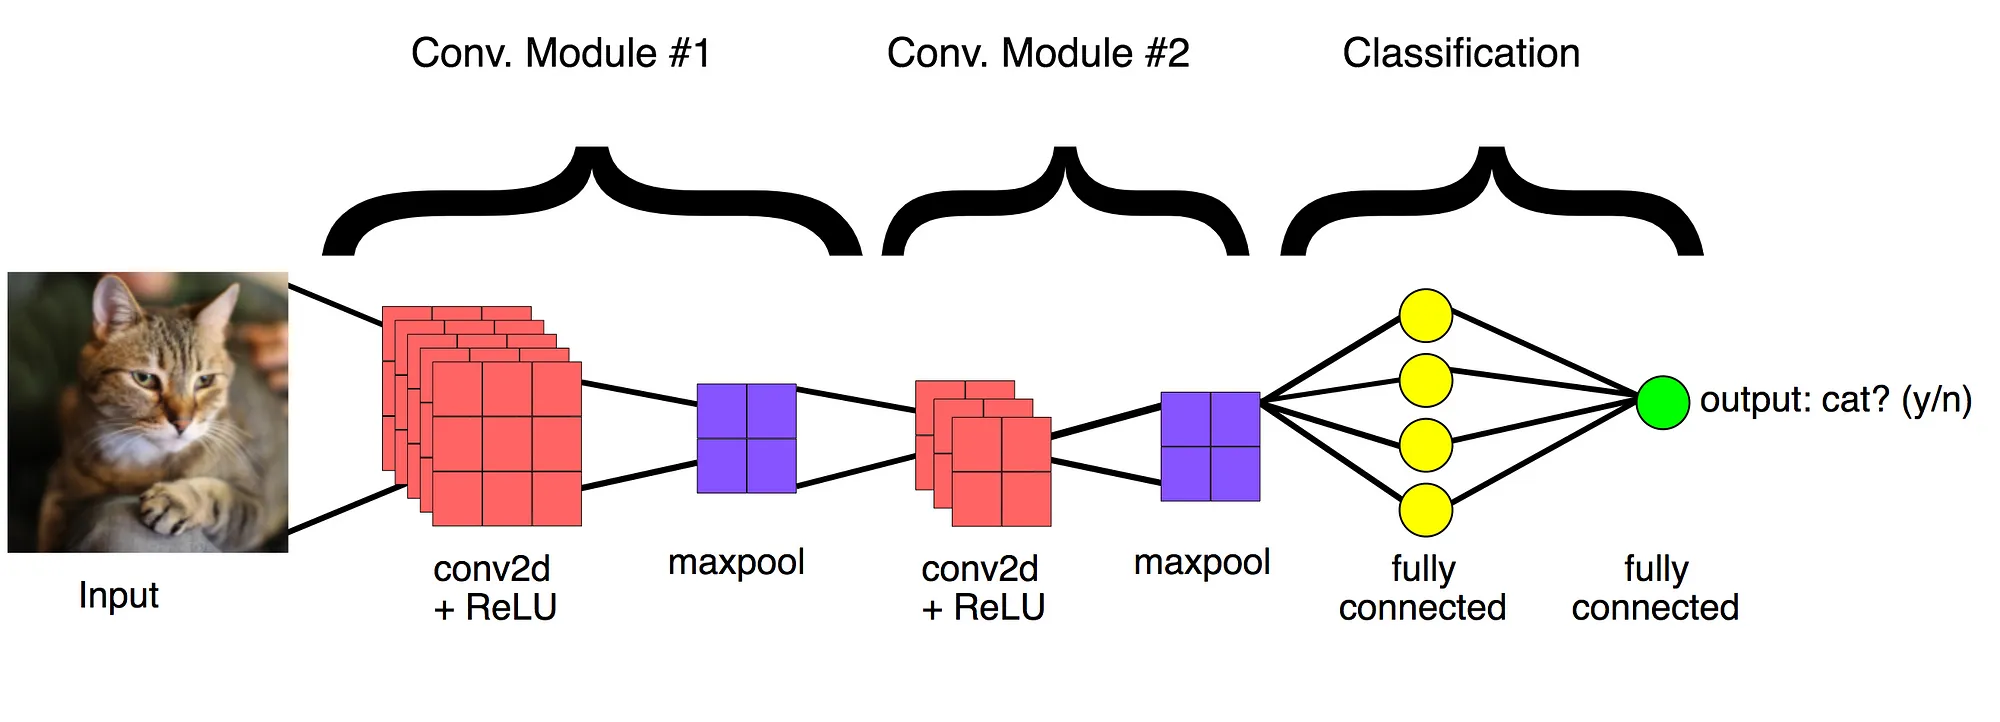

##Convolution Operation: The Core of CNNs

A **convolution** is a mathematical operation that slides a filter (or kernel) over an input image to extract certain features.

**Key Concepts**

- **Filter (Kernel):** A small matrix that we slide over the input image. The filter's size is typically smaller than the input (e.g., 3x3 or 5x5).
- **Stride:** The step size of the filter as it moves across the image.
- **Padding:** Adding extra pixels around the input image to control the output size.

**How Does It Work?**

At each step, the filter matrix is multiplied element-wise with the part of the image it overlaps, and the results are summed up to produce a single number. This number forms the output of the convolution at that position.

Mathematically, if `X` is the input image and `K` is the filter:
$$
Y(i, j) = \sum_{m=0}^{h-1} \sum_{n=0}^{w-1} X(i+m, j+n) \cdot K(m, n)
$$

Where:
- $h$ and $w$ are the height and width of the filter.
- $i$ and $j$ are the coordinates of the top-left corner of the current region of the image being considered.


**Example:**
- **Input Image (5x5 matrix):** Imagine this is a small grayscale image where each value represents the pixel intensity.
- **Filter (Kernel 3x3):** This is a simple filter we will slide across the image.

**How It Works:**

1. We overlay the filter on the top-left corner of the image.
2. We perform an element-wise multiplication between the filter and the overlapping part of the image.
3. We sum up the results of the multiplication to get a single value.
4. We move the filter to the next position (based on the stride) and repeat.

Let's see this in action using Python code.

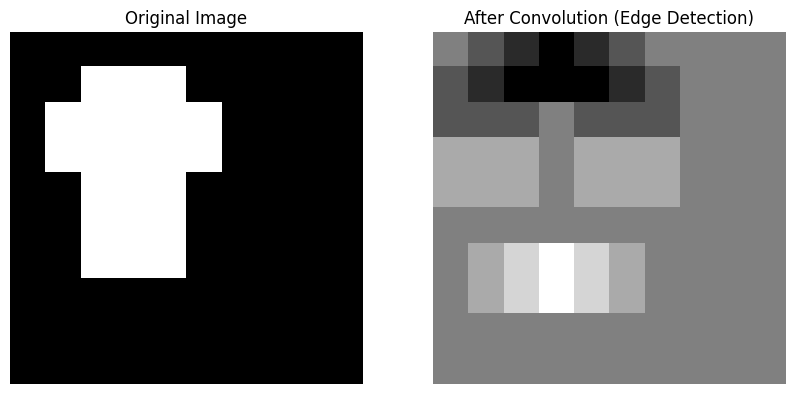

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Create a simple grayscale image (10x10 matrix)
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Define a simple edge detection filter (3x3 Sobel filter)
filter = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

# Apply the convolution operation
convolved_image = convolve(image, filter)

# Plot the original image and the convolved image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title('After Convolution (Edge Detection)')
axes[1].axis('off')

plt.show()


### Visualizing Convolution on an Image

In the plot above:
- The **left image** is the original 10x10 grayscale image. It contains a simple pattern, which can be thought of as a vertical and horizontal edge (like a T-shaped structure).
- The **right image** shows the result of applying a convolution with a 3x3 edge detection filter (Sobel filter). The filter highlights regions where there is a sharp change in pixel intensity, effectively detecting edges.

** Key Points:**

1. Convolution applies the filter across the entire image, detecting patterns such as edges.
2. The output image (feature map) emphasizes the areas of the original image where the filter detected a strong gradient (change in intensity).
3. Different filters can be used to detect different types of features (e.g., horizontal edges, vertical edges, corners).



### Questions: [5 points]
1. What happens if you use a filter with all positive values? [1 point]
2. Try using a different filter, such as: [3 points]
   - Horizontal edge detection: `[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]`
   - Sharpening filter: `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]`
   - Blurring filter: `[[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]`
3. How would increasing the size of the filter affect the output? [1 point]

The best way to answer these questions would be to code them up and see what happens.

### Answers:

### 1.

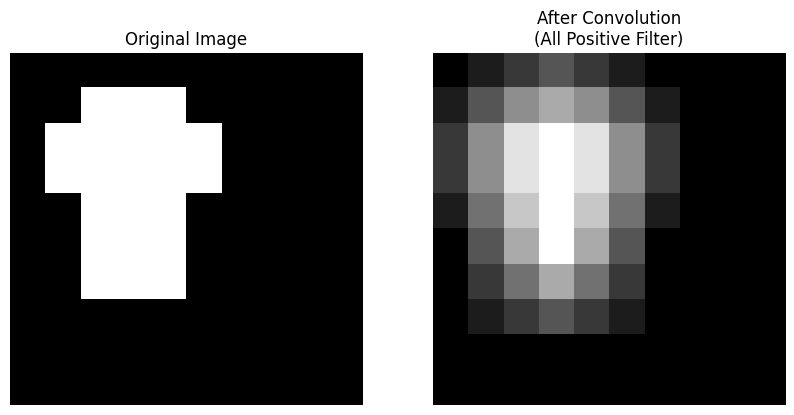

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def apply_and_show_filter(image, kernel, title=''):
    # apply the filter
    convolved_image = convolve(image, kernel)

    # plot original and convolved image
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(convolved_image, cmap='gray')
    axes[1].set_title(f'After Convolution\n({title})')
    axes[1].axis('off')

    plt.show()

# using the same grayscale image as before

image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# testing a filter with all positive values to see what happens

filter_all_positive = np.ones((3, 3))
apply_and_show_filter(image, filter_all_positive, 'All Positive Filter')



**Observations:**

Applying a filter with all positive values results in an image where the original structure becomes blurred and brighter. Since all surrounding pixels are equally weighted and summed, the convolution acts like a local averaging or smoothing filter. The output image loses detail and sharp edges, and instead shows soft transitions, especially around the edges of the shape.
This confirms that such a filter is not useful for edge detection, but instead performs a kind of intensity summation that resembles a blur.

### 2.

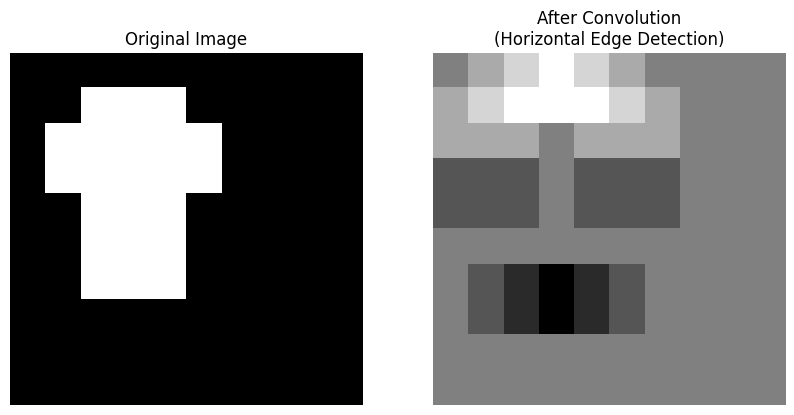

In [ ]:
# horizontal edge detection
horizontal_filter = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
apply_and_show_filter(image, horizontal_filter, 'Horizontal Edge Detection')

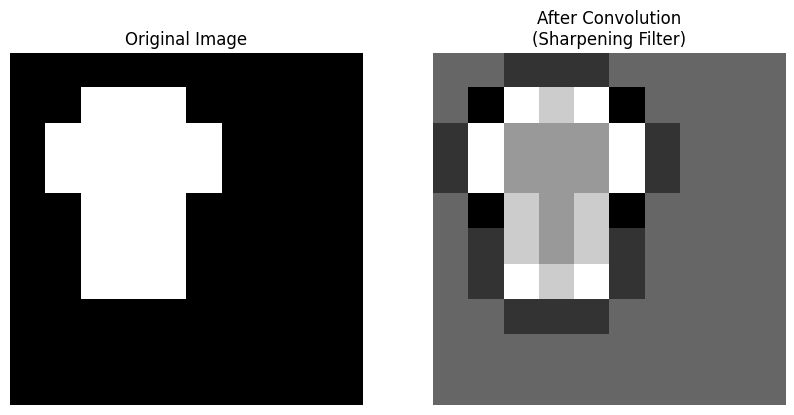

In [ ]:
# sharpening filter
sharpen_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
apply_and_show_filter(image, sharpen_filter, 'Sharpening Filter')


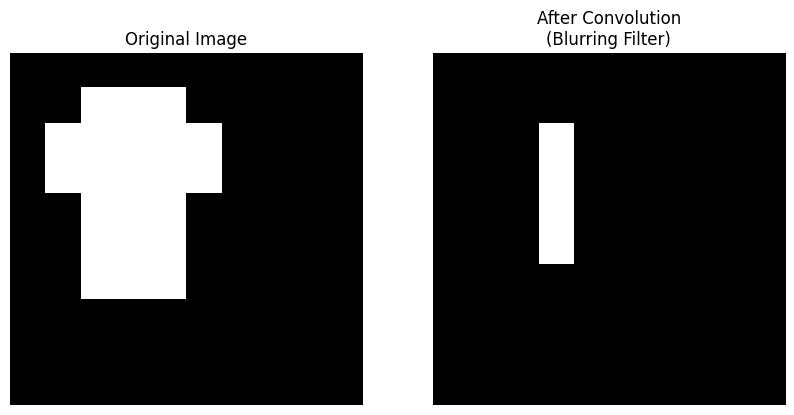

In [ ]:
# blurring filter
blur_filter = np.ones((3, 3)) / 9
apply_and_show_filter(image, blur_filter, 'Blurring Filter')

**Observations:**

The horizontal edge detection filter responds to vertical changes in intensity, which means it detects horizontal lines in the image. In the output, you can clearly see horizontal bands appear at the top and bottom edges of the white cross, where the pixel values shift from dark (0) to bright (1) or vice versa.
The middle of the shape, which doesn't have strong vertical transitions, appears flat or gray. This confirms the filter is successfully highlighting areas with horizontal edge structure, while ignoring vertical edges.

<br>

The sharpening filter emphasizes edges and contrasts by amplifying the difference between a pixel and its neighbors. In the output, we can see that the edges of the shape appear darker, while the inner white region remains bright. This contrast makes the image look crisper and more defined, especially around the perimeter of the cross. However, because the sharpening filter also subtracts surrounding values, it introduces some dark outlines just outside the white shape, which helps make the structure pop but may look artificial or harsh in some cases.

<br>

The blurring filter reduces the contrast between neighboring pixels by averaging them, but because the surrounding area of the white shape is black (zero), the output mostly dims the original shape.
Only the center vertical part of the cross remains visible, and even that appears much fainter than in the original image.
This shows that the blur filter reduces sharpness and can cause parts of the image to almost disappear if surrounded by low-intensity pixels.
The filter is effectively spreading the intensity, which causes the white region to “fade” into the black background.



### 3.

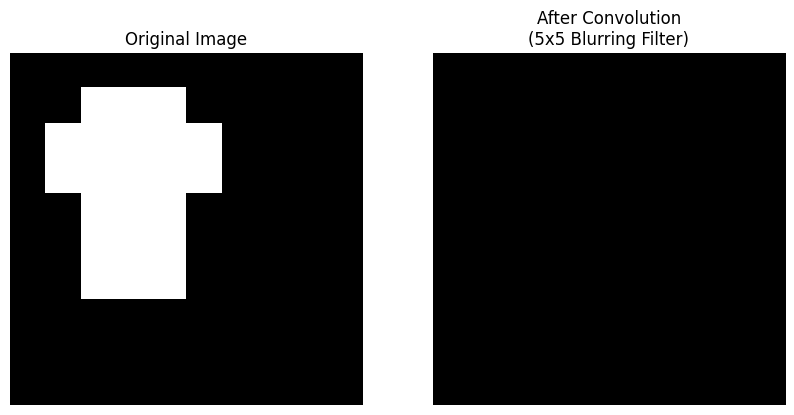

In [31]:
# trying a larger blurring filter to see what happens
large_blur = np.ones((5, 5)) / 25
apply_and_show_filter(image, large_blur, '5x5 Blurring Filter')

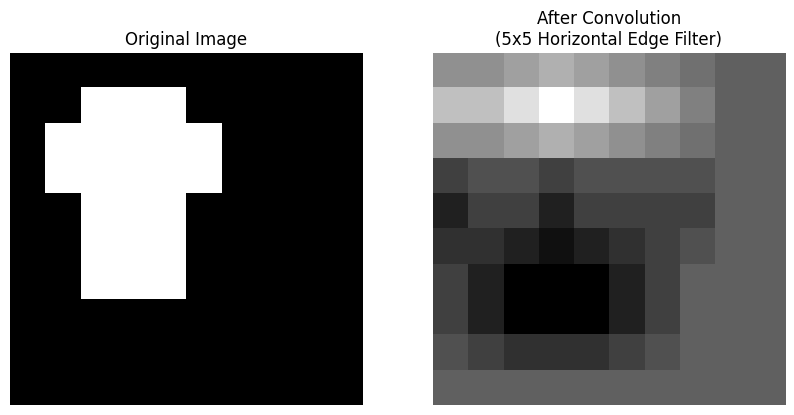

In [ ]:
# trying a larger horizontal edge filter
large_horizontal_edge_filter = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])
apply_and_show_filter(image, large_horizontal_edge_filter, '5x5 Horizontal Edge Filter')


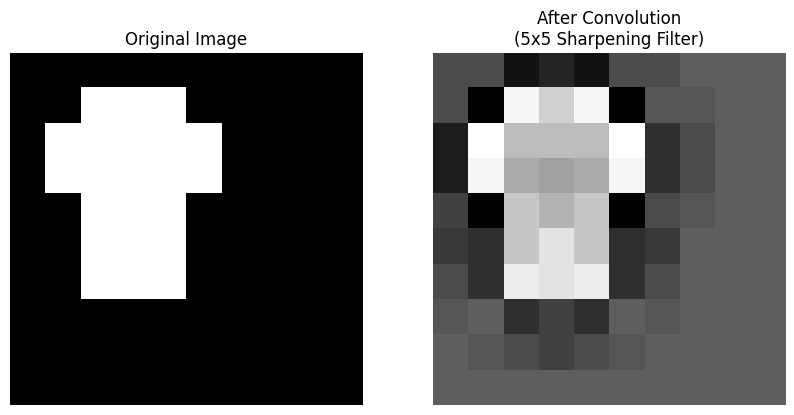

In [ ]:
# trying a larger sharpening filter
large_sharpen_filter = np.array([
    [0, -1, -1, -1, 0],
    [-1, 2, -4, 2, -1],
    [-1, -4, 25, -4, -1],  # center weight = sum of negatives + 1
    [-1, 2, -4, 2, -1],
    [0, -1, -1, -1, 0]
])
apply_and_show_filter(image, large_sharpen_filter, '5x5 Sharpening Filter')


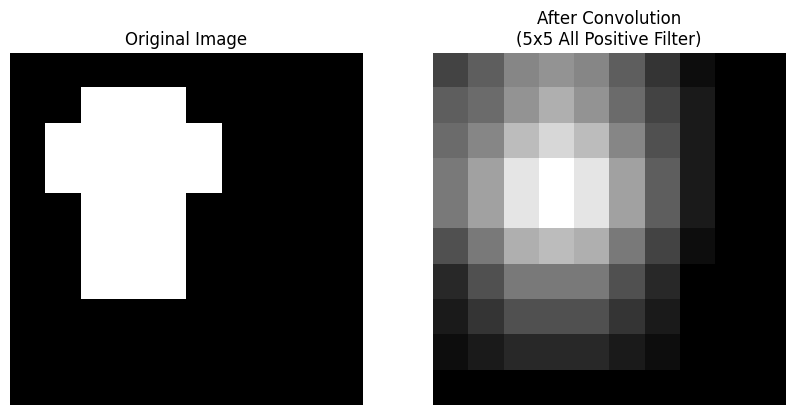

In [ ]:
# trying a larger all positive filter
all_positive_5x5 = np.ones((5, 5))
apply_and_show_filter(image, all_positive_5x5, '5x5 All Positive Filter')

**Observations:**

The 5×5 blurring filter caused the image to become completely faded. The shape is not visible, and it looks like all of the details are lost. This happens because the averaging is done over a much larger region, causing the intensity to spread too thin. Compared to the 3×3 blur, the larger filter applies much stronger smoothing, which removes both noise and useful structure in this case.

<br>

The 5×5 horizontal edge filter produced thicker and blurrier horizontal bands compared to the 3×3 version. While it still highlights horizontal transitions, the edges are less sharp and the details are more spread out. This is because the larger filter responds to broader gradients rather than precise pixel changes.


<br>

The larger sharpening filter made the contrast between the shape and background much more intense. The center of the shape looks brighter, and the edges appear darker and more pronounced than with the smaller 3×3 filter. However, it also created some blocky or exaggerated effects because of the wider area it covers. Overall, the filter sharpens the image more aggressively, but it comes at the expense of smooth, natural detail.

<br>

The 5×5 all-positive filter resulted in a very bright, heavily smoothed output where the original shape was expanded and intensity overflowed into the surrounding area. Since the values are not normalized, this filter dramatically boosts brightness and causes surrounding black regions to become gray. The shape becomes more blurred, and any edge distinction is completely lost.

## Pooling Layer (Max Pooling)

The Pooling Layer is used to down-sample the feature maps, reducing their spatial dimensions while preserving the most important features.

**Intuition:**


Pooling reduces the dimensionality of the feature maps, making the network computationally efficient and less prone to overfitting.

Max Pooling is the most common type of pooling. It selects the maximum value from a specified region (e.g., 2x2) of the feature map.

**How It Works:**

The filter slides over the input feature map with a specified stride (e.g., stride of 2).
For each region it covers, it outputs the maximum value.

 Example:
If the input feature map is:
$$
\text{Input} = \begin{bmatrix}
1 & 3 & 2 & 4 \\
5 & 6 & 1 & 2 \\
2 & 3 & 0 & 1 \\
1 & 2 & 4 & 5
\end{bmatrix}
$$
Using a 2x2 max pooling filter with a stride of 2, the output will be:
$$
\text{Max Pooled Output} = \begin{bmatrix}
6 & 4 \\
3 & 5
\end{bmatrix}
$$

**Benefits of Pooling:**

- Reduces the size of the feature maps, making the network faster and more efficient.
- Helps make the network **translation invariant**, meaning it can detect features regardless of their exact position in the image.


Now lets see this in action

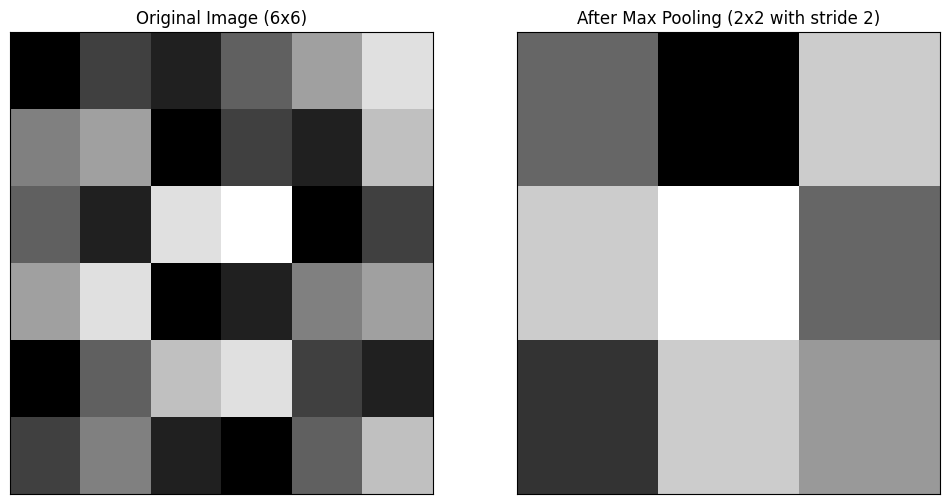

Original Image:
 [[1 3 2 4 6 8]
 [5 6 1 3 2 7]
 [4 2 8 9 1 3]
 [6 8 1 2 5 6]
 [1 4 7 8 3 2]
 [3 5 2 1 4 7]]

Pooled Image (Max Pooling with 2x2 filter and stride 2):
 [[6. 4. 8.]
 [8. 9. 6.]
 [5. 8. 7.]]


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 6x6 grayscale image (matrix)
image = np.array([
    [1, 3, 2, 4, 6, 8],
    [5, 6, 1, 3, 2, 7],
    [4, 2, 8, 9, 1, 3],
    [6, 8, 1, 2, 5, 6],
    [1, 4, 7, 8, 3, 2],
    [3, 5, 2, 1, 4, 7]
])

# Define the pooling size and stride
pool_size = 2
stride = 2

# Calculate the dimensions of the output after pooling
output_height = (image.shape[0] - pool_size) // stride + 1
output_width = (image.shape[1] - pool_size) // stride + 1

# Initialize the pooled output matrix
pooled_image = np.zeros((output_height, output_width))

# Perform Max Pooling manually
for i in range(output_height):
    for j in range(output_width):
        # Define the current pooling region
        region = image[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size]
        # Take the maximum value from the current region
        pooled_image[i, j] = np.max(region)

# Display the original image and the pooled image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(image, cmap='gray', aspect='auto')
axes[0].set_title('Original Image (6x6)')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Pooled image
axes[1].imshow(pooled_image, cmap='gray', aspect='auto')
axes[1].set_title('After Max Pooling (2x2 with stride 2)')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

# Print the original and pooled image matrices
print("Original Image:\n", image)
print("\nPooled Image (Max Pooling with 2x2 filter and stride 2):\n", pooled_image)


### Question on Max Pooling [4 points]

Given the following 4x4 matrix and a 2x2 Max Pooling filter with a stride of 2, what is the output?

$$
     \text{Matrix} = \begin{bmatrix}
     2 & 4 & 1 & 3 \\
     0 & 6 & 3 & 8 \\
     5 & 1 & 7 & 2 \\
     9 & 2 & 0 & 4
     \end{bmatrix}
$$

Do this step by step rather than with code.

### Answer:

Given this matrix:


\begin{bmatrix}
2 & 4 & 1 & 3 \\
0 & 6 & 3 & 8 \\
5 & 1 & 7 & 2 \\
9 & 2 & 0 & 4 \\
\end{bmatrix}


We divide the matrix into non-overlapping $2 \times 2$ regions:

1. Top-left:
$\begin{bmatrix} 2 & 4 \\ 0 & 6 \end{bmatrix} \Rightarrow \max = 6$

2. Top-right:
$\begin{bmatrix} 1 & 3 \\ 3 & 8 \end{bmatrix} \Rightarrow \max = 8$

3. Bottom-left:
$\begin{bmatrix} 5 & 1 \\ 9 & 2 \end{bmatrix} \Rightarrow \max = 9$

4. Bottom-right:
$\begin{bmatrix} 7 & 2 \\ 0 & 4 \end{bmatrix} \Rightarrow \max = 7$

<br>

So, the final pooled output is:


\begin{bmatrix}
6 & 8 \\
9 & 7 \\
\end{bmatrix}



##**Fully Connected Layer**


The **Fully Connected (FC) Layer** is similar to the dense layers used in Multi-Layer Perceptrons (MLPs). It takes the **flattened** feature map (1D vector) as input and produces the final output predictions.


**Intuition:**

- After several convolution and pooling layers, the feature maps have been reduced to a compact, high-level representation of the input image.
- The fully connected layer combines these features to make a final prediction (e.g., classification).

**How It Works:**

1. **Flattening:** The 2D feature map is converted into a 1D vector.
2. **Dense Layers:** The flattened vector is passed through one or more dense layers, where each neuron is connected to every neuron in the previous layer.
3. **Output Layer:** The final layer usually has as many neurons as the number of classes in the classification task. It often uses a **softmax** activation function to produce a probability distribution over the classes.

**Example:**

Suppose the flattened vector is:
$$
\text{Flattened Input} = [0.1, 0.5, 0.3, 0.7]
$$
If we have a dense layer with weights \( W \) and biases \( b \), the output is computed as:
$$
\text{Output} = W \cdot \text{Flattened Input} + b
$$

The final layer might use softmax activation:
$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$
to output a probability for each class.


## Define function to create a convolutional neural network (CNN) model [9 points]

Now we have learned the basic structure of Convolutional Neural Network. In this function, we will create a Convolutional Neural Network (CNN) model suitable for image data.


1. Create a Sequential model.
2. Add a Conv2D layer with 32 filters, kernel size 3x3, ReLU activation, and input shape.
3. Add a MaxPooling2D layer to reduce dimensionality.
4. Repeat Conv2D and MaxPooling2D layers with increasing filter sizes.
5. Flatten the feature maps to create a 1D vector.
6. Add a Dense layer with ReLU activation.
7. Add an output layer with softmax activation for classification.
8. Compile the model using Adam optimizer, categorical crossentropy loss, and accuracy metric.


In [38]:
def create_cnn_model(input_shape: list[int]) -> tf.keras.Model:
    """
    Create and compile a convolutional neural network (CNN) model.

    Args:
        input_shape (list[int]): The shape of input images.

    Returns:
        tf.keras.Model: Compiled TensorFlow model.

    Detailed Notes:
        This function creates a Convolutional Neural Network (CNN) model with multiple layers:
        1. Input Layer: Takes the shape of the input images as input_shape.
        2. Convolutional and Pooling Layers:
            - First convolutional layer with 32 filters, kernel size 3x3, ReLU activation, followed by MaxPooling.
            - Second convolutional layer with 64 filters, kernel size 3x3, ReLU activation, followed by MaxPooling.
            - Third convolutional layer with 128 filters, kernel size 3x3, ReLU activation, followed by MaxPooling.
        3. Flatten Layer: Flattens the feature maps into a 1D vector.
        4. Dense Layers:
            - First dense layer with 128 units and ReLU activation function.
            - Output layer with 10 units (for 10 classes) and softmax activation for classification.
        The model is compiled using the Adam optimizer, Categorical Crossentropy as the loss function,
        and Accuracy as the evaluation metric.
    """
    # fill code here

    model = tf.keras.Sequential([
        # input + convolution + pooling layers
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # flatten and dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )


    return model

## Train and evaluate the CNN model [6 points]
This function will train the model using the training data and then evaluate its performance on the test data.
1. Train the model using the fit() method with training data, specifying epochs, batch size, and validation split.
2. Evaluate the model on the test data using the evaluate() method.
3. Print the test loss and accuracy.


In [44]:
# fill code to run the model and print test accuracy.

model = create_cnn_model(input_shape=(32, 32, 3))

# train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")



Epoch 1/15
704/704 - 9s - 12ms/step - accuracy: 0.3980 - loss: 1.6410 - val_accuracy: 0.5166 - val_loss: 1.3473
Epoch 2/15
704/704 - 6s - 9ms/step - accuracy: 0.5408 - loss: 1.2776 - val_accuracy: 0.6040 - val_loss: 1.1194
Epoch 3/15
704/704 - 5s - 8ms/step - accuracy: 0.5996 - loss: 1.1333 - val_accuracy: 0.6446 - val_loss: 1.0127
Epoch 4/15
704/704 - 4s - 5ms/step - accuracy: 0.6347 - loss: 1.0346 - val_accuracy: 0.6686 - val_loss: 0.9524
Epoch 5/15
704/704 - 5s - 7ms/step - accuracy: 0.6656 - loss: 0.9606 - val_accuracy: 0.6930 - val_loss: 0.8871
Epoch 6/15
704/704 - 6s - 8ms/step - accuracy: 0.6844 - loss: 0.9046 - val_accuracy: 0.6932 - val_loss: 0.8893
Epoch 7/15
704/704 - 5s - 7ms/step - accuracy: 0.6972 - loss: 0.8566 - val_accuracy: 0.6958 - val_loss: 0.8800
Epoch 8/15
704/704 - 3s - 5ms/step - accuracy: 0.7141 - loss: 0.8131 - val_accuracy: 0.7320 - val_loss: 0.7812
Epoch 9/15
704/704 - 4s - 5ms/step - accuracy: 0.7289 - loss: 0.7733 - val_accuracy: 0.7162 - val_loss: 0.8269


## Bonus: Can you achieve an accuracy of at least 80% on test set? [5 points]

Briefly explain what you did to get credit.

In [47]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Dropout(0.15),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Dropout(0.15),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.15),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.15),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.0001, beta_1=0.95)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# implementing data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# train/val split
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# using early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# build and train model
model = create_cnn_model(input_shape=(32, 32, 3))
history = model.fit(
    datagen.flow(X_train_sub, y_train_sub, batch_size=64),
    epochs=60,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=2
)

# evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/60
704/704 - 50s - 71ms/step - accuracy: 0.3410 - loss: 1.8482 - val_accuracy: 0.4186 - val_loss: 1.5902
Epoch 2/60
704/704 - 29s - 41ms/step - accuracy: 0.4685 - loss: 1.4684 - val_accuracy: 0.5284 - val_loss: 1.2758
Epoch 3/60
704/704 - 29s - 42ms/step - accuracy: 0.5196 - loss: 1.3293 - val_accuracy: 0.5580 - val_loss: 1.1992
Epoch 4/60
704/704 - 28s - 40ms/step - accuracy: 0.5662 - loss: 1.2145 - val_accuracy: 0.5856 - val_loss: 1.1396
Epoch 5/60
704/704 - 27s - 39ms/step - accuracy: 0.6013 - loss: 1.1228 - val_accuracy: 0.6210 - val_loss: 1.0903
Epoch 6/60
704/704 - 29s - 41ms/step - accuracy: 0.6266 - loss: 1.0563 - val_accuracy: 0.6296 - val_loss: 1.0313
Epoch 7/60
704/704 - 28s - 39ms/step - accuracy: 0.6483 - loss: 0.9950 - val_accuracy: 0.6612 - val_loss: 0.9502
Epoch 8/60
704/704 - 27s - 39ms/step - accuracy: 0.6745 - loss: 0.9302 - val_accuracy: 0.6692 - val_loss: 0.9556
Epoch 9/60
704/704 - 27s - 39ms/step - accuracy: 0.6870 - loss: 0.8894 - val_accuracy: 0.6662 - 

**Explanation:**

To reach a test accuracy of 80.41%, I made the following changes to both the model architecture and training strategy that helped the CNN learn better features and generalize more effectively:

<br>

1) Deeper CNN architecture: I used three convolutional blocks with increasing filter sizes (32, 64, and 128), allowing the model to capture more complex patterns and features at different levels. Each block was followed by batch normalization, dropout, and max pooling to stabilize training and reduce overfitting.

<br>

2) Batch normalization: Adding batch normalization after each convolutional layer helped normalize the outputs, which made the model train faster and more reliably. It also reduced internal covariate shift, which can destabilize deep networks.

<br>

3) Dropout regularization: I used dropout with a rate of 0.15 after each block and before the final dense layers. This helped prevent overfitting by randomly deactivating neurons during training, encouraging the model to learn more general features.

<br>

4) Data augmentation: I implemented data augmentation using the ImageDataGenerator with transformations like small rotations, shifts, shear, zoom, and horizontal flips. These augmentations artificially expanded the training set and helped the model become more robust to small changes in the input data.

<br>

5) Early stopping: I added early stopping with a patience of 5 epochs and restored the best weights, ensuring that the model wouldn't overfit if the validation loss started increasing. This allowed training to stop at the optimal point.

<br>

5) Tuned optimizer: I used the Adam optimizer with a low learning rate of 0.0001 and $\beta_1 = 0.95$, which provided stable and fine-grained updates to the weights. This made the optimization process more controlled and improved convergence.

<br>

Together, these changes made the model more expressive, more robust, and less prone to overfitting, allowing it to break the 80% test accuracy threshold.

# Support Vector Machines [11 points]


## Part 1 [5 points]

Look at the dataset below. It has two classes and 1 X variable. Propose two feature transformations that wil make the data linearly separable.


Text(0, 0.5, 'Class')

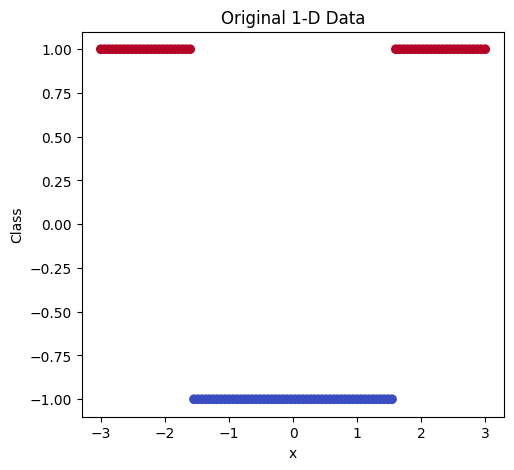

In [46]:
# Generate 1-D dataset
x = np.linspace(-3, 3, 100)
y = np.where(x**2 > 2.5, 1, -1)

# Apply transformation: x' = x^2
x_transformed = x**2

# Plot original and transformed data
plt.figure(figsize=(12, 5))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=y, cmap='coolwarm')
plt.title("Original 1-D Data")
plt.xlabel("x")
plt.ylabel("Class")


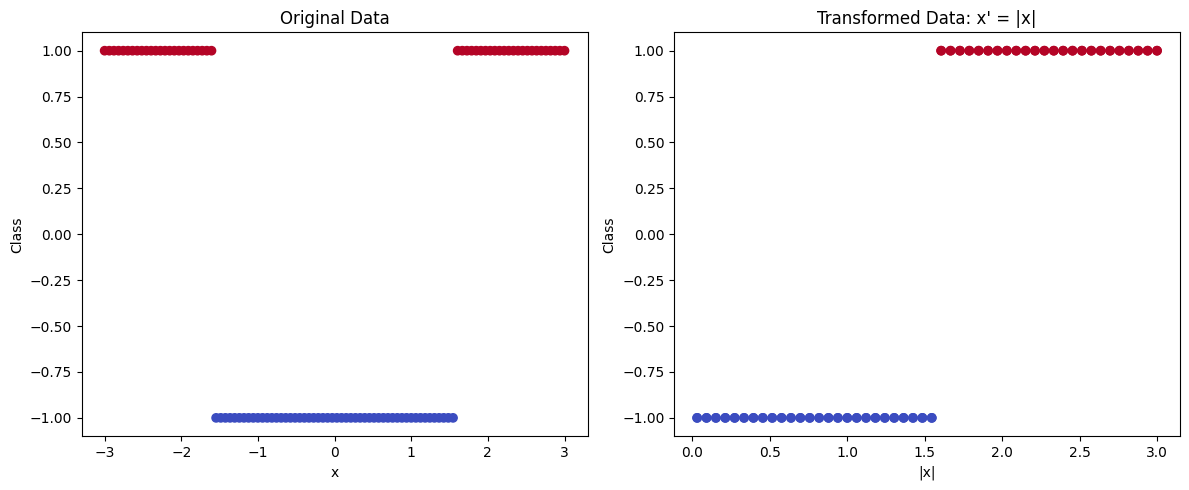

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# original 1D dataset
x = np.linspace(-3, 3, 100)
y = np.where(x**2 > 2.5, 1, -1)

# proposed transformation 1: x' = |x|
x_transformed_1 = np.abs(x)

# plot original vs transformed
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, c=y, cmap='coolwarm')
plt.title("Original Data")
plt.xlabel("x")
plt.ylabel("Class")

plt.subplot(1, 2, 2)
plt.scatter(x_transformed_1, y, c=y, cmap='coolwarm')
plt.title("Transformed Data: x' = |x|")
plt.xlabel("|x|")
plt.ylabel("Class")

plt.tight_layout()
plt.show()


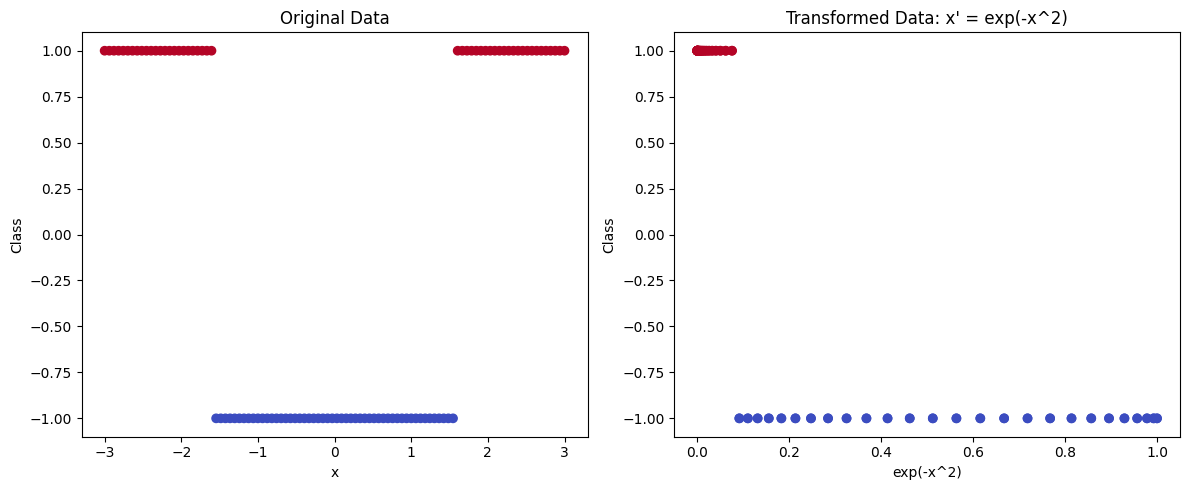

In [49]:
# proposed transformation 2: x' = exp(-x^2)
x_transformed_2 = np.exp(-x**2)

# plot original vs transformed
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, c=y, cmap='coolwarm')
plt.title("Original Data")
plt.xlabel("x")
plt.ylabel("Class")

plt.subplot(1, 2, 2)
plt.scatter(x_transformed_2, y, c=y, cmap='coolwarm')
plt.title("Transformed Data: x' = exp(-x^2)")
plt.xlabel("exp(-x^2)")
plt.ylabel("Class")

plt.tight_layout()
plt.show()


Two transformations that would make the data linearly separable would be:

1) Absolute value transformation: In the first plot, I applied the transformation $x' = |x|$, which maps both positive and negative values of $x$ to the positive axis. As a result, the red class points (which were located at both ends of the $x$-axis in the original plot) become clustered farther from zero, while the blue class points (originally near $x = 0$ in the original plot) remain close to zero. This transformation makes the classes more separable, and a simple vertical decision boundary (e.g., $x' = 1.5$) can distinguish them.

<br>

2) Exponential transformation: In the second plot, I applied the transformation $x' = \exp(-x^2)$, which compresses values farther from zero toward 0, and amplifies the center region near $x = 0$. Since the blue class is concentrated near $x = 0$, it maps to values near 1, while the red class (which lies at the edges) maps to values near 0. This creates a clear separation in the transformed feature space, enabling linear classification.

<br>

In both transformations, the two classes are mapped to distinct regions of the transformed space, which allows a linear classifier to separate them effectively with a straight-line decision boundary.


## Part 2 [6 points]

Show that the distance $d$ of a support vector from the max margin separating hyperplane is $\frac{1}{w}$ where $w^Tx + b = 0$ is the equation of the hyperplane.

We are given the equation of the hyperplane:
$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

To compute the perpendicular distance $d$ from a support vector $\mathbf{x}_i$ to this hyperplane, we use the formula:
<br>

$$
d = \frac{|\mathbf{w}^T \mathbf{x}_i + b|}{\|\mathbf{w}\|}
$$

<br>
Since support vectors in an SVM lie exactly on the margin, they satisfy:
$$
y_i(\mathbf{w}^T \mathbf{x}_i + b) = 1
$$

<br>
This implies that:
$$
|\mathbf{w}^T \mathbf{x}_i + b| = 1
$$

<br>
Substituting this into the distance formula, we have:
$$
d = \frac{1}{\|\mathbf{w}\|}
$$

<br>
Therefore we have shown that the distance $d$ of a suport vector from the max margin separating the hyperplace is $\frac{1}{\|\mathbf{w}\|}$.
